# Implementação do Algoritmo KNN

In [1]:
import torch
import matplotlib.pyplot as plt
from torch.nn.functional import normalize
from sklearn import datasets
from sklearn.utils import shuffle

In [2]:
from supervisioned.knn.KNN import KNN
from util.TrainTestSplitter import TTSplitter
from util.PlotLib import PlotDecisionBoundary

## Carregando base de dados: Iris

In [3]:
iris = datasets.load_iris()

## Separando a base de dados em treino e teste

Para realização da prática, a quantidade de amostras utilizadas para realização do treinamento, armazenamento dos dados em memória, foi equivalente ao valor de 80% do total. Restando, portanto, 20% para realização dos testes. Ademais, as entradas foram normalizadas para um melhor desempenho do algoritmo KNN. Por fim, as respectivas entradas e saídas são divididas.

In [4]:
# Embaralhando a base de dados
samples, targets = shuffle(iris.data, iris.target)
samples, targets = normalize(torch.tensor(samples), 2), torch.tensor(targets)
x_train, x_test, y_train, y_test = TTSplitter(samples, targets, 0.80).split()

# Samples has 4 attributes, you have to choose two of them.

Para que os dados pudessem ser visualizados, foi preciso realizar o processo com 2 atributos, altura da sépala e largura da sépala.

In [5]:
attr = [0, 1]

## Visualizando as amostras no plano cartesiano

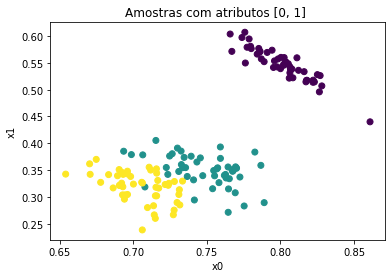

In [6]:
plt.scatter(samples[:, attr[0]], samples[:, attr[1]], c=targets)
plt.title("Amostras com atributos %s " % attr)
plt.xlabel("x0")
plt.ylabel("x1")
plt.show()

## Criação dos pontos do plano de decisão do algoritmo

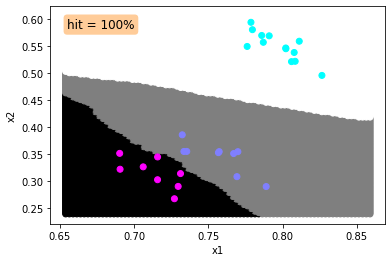

In [7]:
pdb = PlotDecisionBoundary(x_test, y_test, x_train, y_train, attr=attr)
plt = pdb.plot_decision_boundary(plt, KNN, k=19)
# plt.show()

# Conclusão

É possível perceber pelos gráficos que quando menor o K, limitado ao mínimo de 1, maior será o _overfitting_ e, portanto, mais distante da função que gera o plano de decisão. Isto pode causar imprecisões a novas amostras que o algoritmo precise classificar.